In [28]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Columnas disponibles: Index(['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id',
       'temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'fallo_detectado', 'tipo_fallo', 'cantidad_producida',
       'unidades_defectuosas', 'eficiencia_porcentual', 'consumo_energia',
       'paradas_programadas', 'paradas_imprevistas', 'observaciones'],
      dtype='object')
----- eficiencia_porcentual -----
MSE: 52.523273506983095
R²: -1.1440827402512745

----- unidades_defectuosas -----
MSE: 3.9741666666666666
R²: -1.0225796054082479


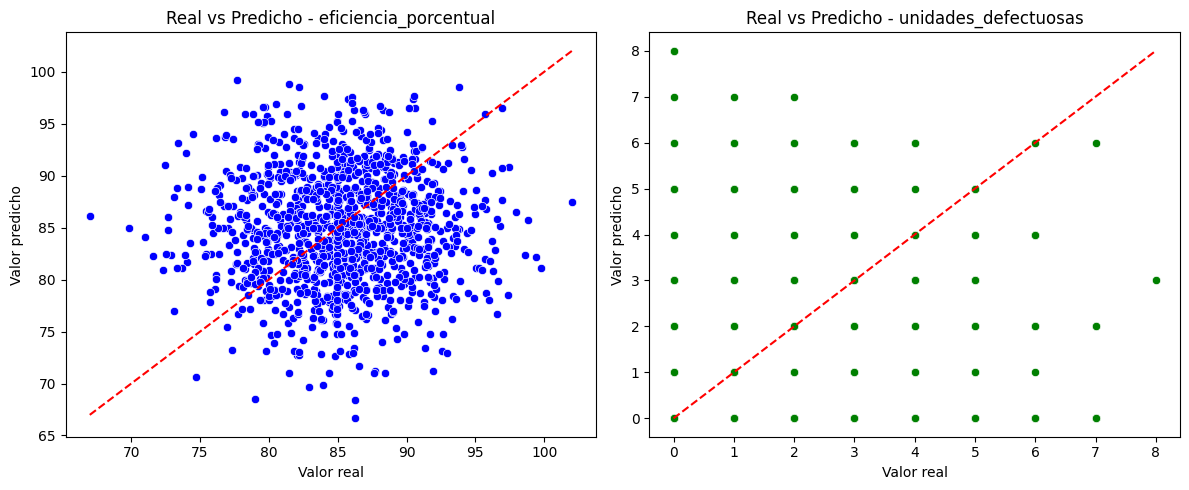

In [29]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Cargar los datos
df = pd.read_csv('TL.csv')

# 3. Inspeccionar las columnas
print("Columnas disponibles:", df.columns)

# 4. Preprocesamiento: eliminar columnas no útiles o no numéricas
df_clean = df.select_dtypes(include=['number']).dropna()

# 5. Definir variables predictoras (X) y variable objetivo (y)
X = df_clean.drop(columns=['eficiencia_porcentual', 'unidades_defectuosas'])
y_eficiencia = df_clean['eficiencia_porcentual']
y_defectos = df_clean['unidades_defectuosas']

# 6. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train_eff, y_test_eff = train_test_split(X, y_eficiencia, test_size=0.2, random_state=42)
_, _, y_train_def, y_test_def = train_test_split(X, y_defectos, test_size=0.2, random_state=42)

# 7. Entrenar modelo de árbol de decisión para eficiencia
tree_eff = DecisionTreeRegressor(random_state=42)
tree_eff.fit(X_train, y_train_eff)
y_pred_eff = tree_eff.predict(X_test)

# 8. Entrenar modelo de árbol de decisión para defectos
tree_def = DecisionTreeRegressor(random_state=42)
tree_def.fit(X_train, y_train_def)
y_pred_def = tree_def.predict(X_test)

# 9. Evaluar modelos
print("----- eficiencia_porcentual -----")
print("MSE:", mean_squared_error(y_test_eff, y_pred_eff))
print("R²:", r2_score(y_test_eff, y_pred_eff))

print("\n----- unidades_defectuosas -----")
print("MSE:", mean_squared_error(y_test_def, y_pred_def))
print("R²:", r2_score(y_test_def, y_pred_def))

# 10. Visualizar resultados
plt.figure(figsize=(12, 5))

# Gráfico eficiencia
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_eff, y=y_pred_eff, color='blue')
plt.plot([y_test_eff.min(), y_test_eff.max()], [y_test_eff.min(), y_test_eff.max()], 'r--')
plt.title('Real vs Predicho - eficiencia_porcentual')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')

# Gráfico defectos
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_def, y=y_pred_def, color='green')
plt.plot([y_test_def.min(), y_test_def.max()], [y_test_def.min(), y_test_def.max()], 'r--')
plt.title('Real vs Predicho - unidades_defectuosas')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("TL.csv")
print(df.columns)


Index(['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id',
       'temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'fallo_detectado', 'tipo_fallo', 'cantidad_producida',
       'unidades_defectuosas', 'eficiencia_porcentual', 'consumo_energia',
       'paradas_programadas', 'paradas_imprevistas', 'observaciones'],
      dtype='object')
